In [25]:
import xarray as xr
import matplotlib.pyplot as plt
import hvplot.xarray # noqa
import panel.widgets as pnw
import panel as pn
from bokeh.resources import INLINE

file1 = r'F:\SpaFHy_2D_2021/testcase_input_202305091651.nc' # no return flow from 2D to bucket
file2 = r'F:\SpaFHy_2D_2021/testcase_input_202305091607.nc' # return flow possible from 2D to bucket
file3 = r'F:\SpaFHy_2D_2021/testcase_input_202305090927.nc' # twi_cutoff = 97.5 ; m = 0.025

norf = xr.open_dataset(file1)
rf = xr.open_dataset(file2)
top = xr.open_dataset(file3)

In [5]:
im1 = norf['bucket_moisture_root'].hvplot.image(width=650,height=500,cmap='bwr_r', clim=(0.09,0.88), title='no return flow')
im2 = rf['bucket_moisture_root'].hvplot.image(width=650,height=500, cmap='bwr_r', clim=(0.09,0.88), title='return flow')
im1 + im2

:Layout
   .DynamicMap.I  :DynamicMap   [time]
      :Image   [lon,lat]   (bucket_moisture_root)
   .DynamicMap.II :DynamicMap   [time]
      :Image   [lon,lat]   (bucket_moisture_root)

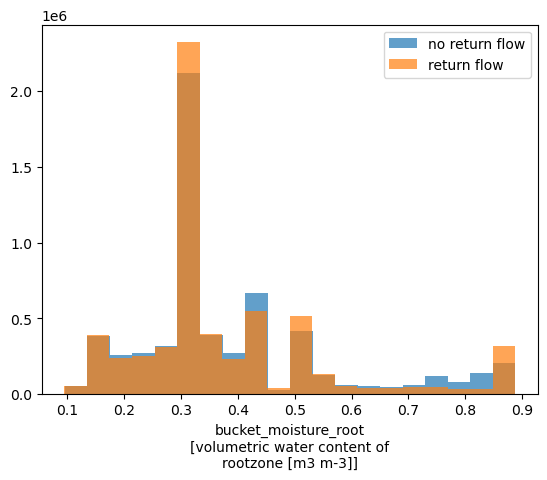

In [4]:
time = '2021-09-01'
norf['bucket_moisture_root'].plot.hist(alpha=0.7, bins=20, label='no return flow')
rf['bucket_moisture_root'].plot.hist(alpha=0.7, bins=20, label='return flow')
plt.legend()

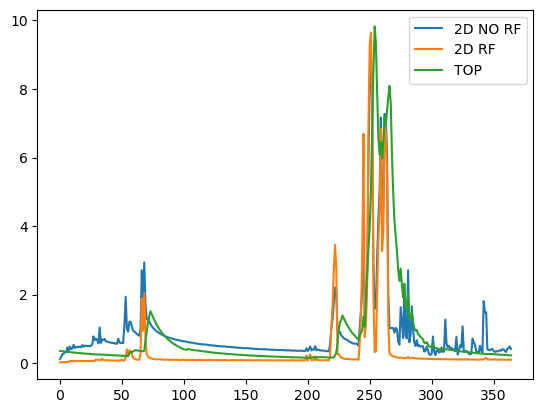

In [30]:
plt.plot((rf['soil_netflow_to_ditch'].mean(dim=['lat','lon'])+(rf['bucket_surface_runoff'].mean(dim=['lat','lon']))), label='2D RF')
plt.plot((norf['soil_netflow_to_ditch'].mean(dim=['lat','lon'])+(norf['bucket_surface_runoff'].mean(dim=['lat','lon']))), label='2D NO RF')
plt.plot((top['top_baseflow'])+(top['bucket_surface_runoff'].mean(dim=['lat','lon'])), label='TOP')
plt.legend()